In [22]:
import pandas as pd
import numpy as np

from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv(r'C:\Users\kratik\Downloads\AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [24]:
df.isnull().sum()


Month          0
#Passengers    0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [26]:
#From above we can see that 'Month' column datatype is 'object'. To proceed for timeseries analysis, we need to make it as datetime format
df['Month']=pd.to_datetime(df['Month'])

In [27]:
#Also passengers column is in int format. But for calculation / prediction we mostly get float dtype. So updatiung the dtype.
df['#Passengers']=df['#Passengers'].astype('float64')

In [28]:
#After converting dtype let's get the overall details of dataset now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [29]:
#Again to work in TSA, we can make month column to the index of dataset
df.set_index('Month',inplace=True)

<AxesSubplot:xlabel='Month'>

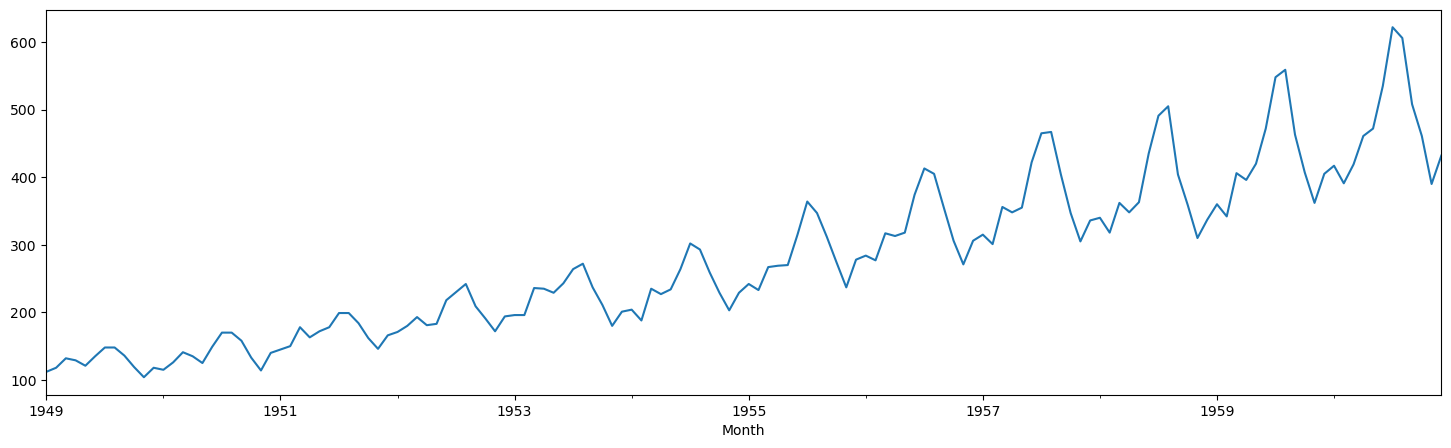

In [30]:
df['#Passengers'].plot(figsize=(18,5))

In [31]:
#Before going for TSA, we should check the stationarity  of data.
#Here we are using Augmented Dicky-Fuller (ADF)  test and Null Hypothesis concept for stationarity of data
#Creating a function to use this test frquently
def fullertest(series):
    result=adfuller(series)
    pvalue = result[1]
    if pvalue > .05:
        print('We have great evidence where we can not reject null hypothesis and tell data is not stationary')
    else:
        print('We have great evidence where we can reject null hypothesis and tell data is stationary')

In [32]:
fullertest(df['#Passengers'])

We have great evidence where we can not reject null hypothesis and tell data is not stationary


Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: 1 Shifted Passengers, dtype: float64
We have great evidence where we can not reject null hypothesis and tell data is not stationary


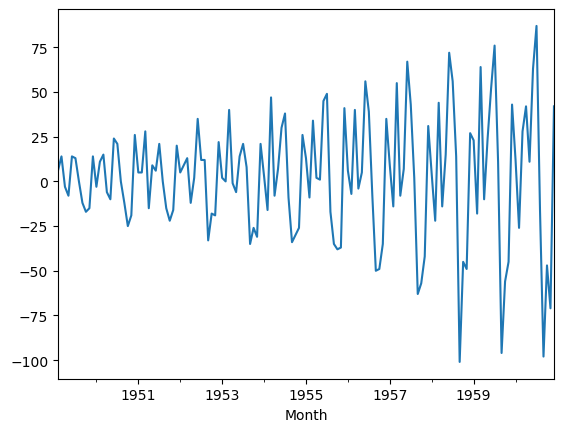

In [33]:
#From above we can see that our dataset is not stationary data. Lets use 'Diffrentiate' concept to make it stationary
#Shifting 1 row and the find the difference
df['1 Shifted Passengers'] = df['#Passengers'] - df['#Passengers'].shift(1)
print(df['1 Shifted Passengers'].head())
df = df.dropna()
df['1 Shifted Passengers'].plot()
fullertest(df['1 Shifted Passengers'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


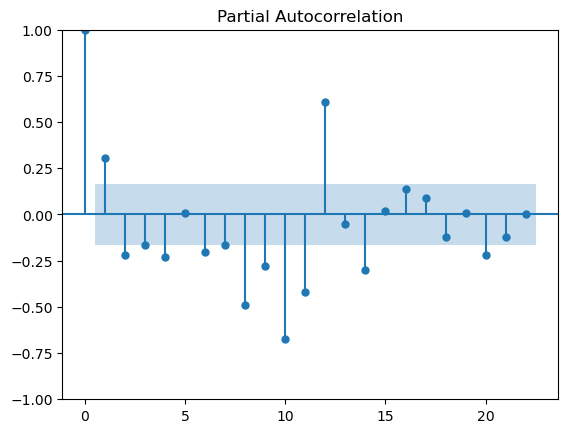

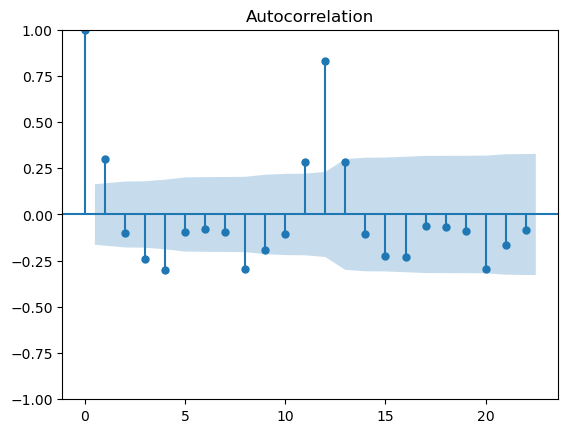

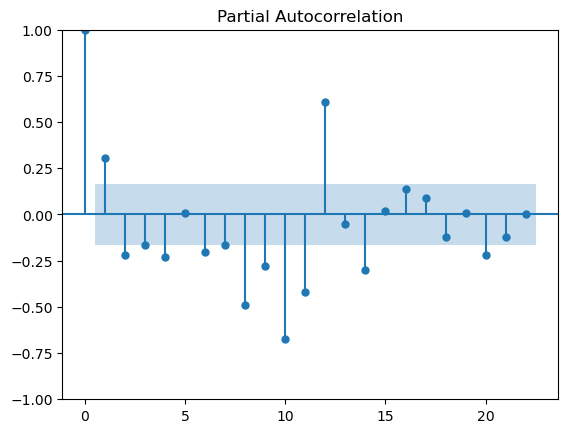

In [34]:
#Plotting the ACF and PACF for above data
plot_acf(df['1 Shifted Passengers'])
plot_pacf(df['1 Shifted Passengers'])

Month
1949-02-01     NaN
1949-03-01     NaN
1949-04-01    11.0
1949-05-01   -11.0
1949-06-01     6.0
Name: 2 Shifted Passengers, dtype: float64
We have great evidence where we can reject null hypothesis and tell data is stationary


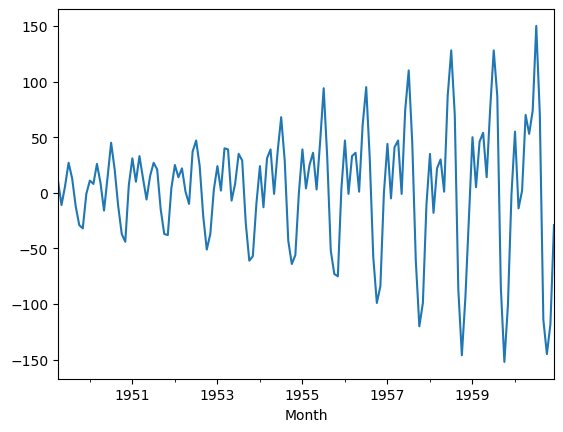

In [35]:
#Shifting 2 row and the find the difference
df['2 Shifted Passengers'] = df['#Passengers'] - df['#Passengers'].shift(2)
print(df['2 Shifted Passengers'].head())
df = df.dropna()
df['2 Shifted Passengers'].plot()
fullertest(df['2 Shifted Passengers'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


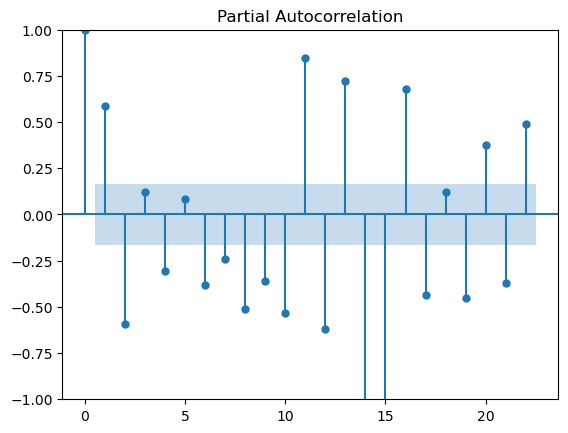

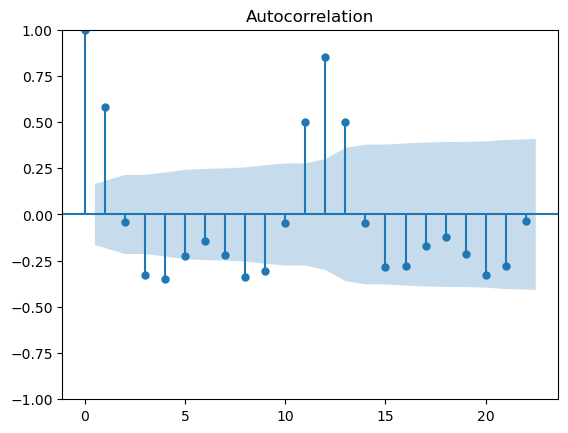

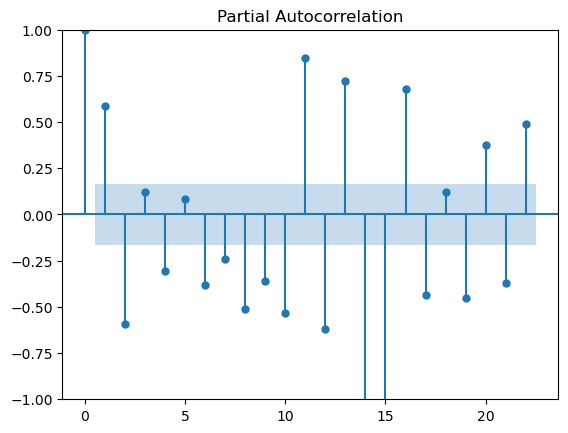

In [36]:
plot_acf(df['2 Shifted Passengers'])
plot_pacf(df['2 Shifted Passengers'])

Month
1949-04-01   NaN
1949-05-01   NaN
1949-06-01   NaN
1949-07-01   NaN
1949-08-01   NaN
Name: 12 Shifted Passengers, dtype: float64
We have great evidence where we can reject null hypothesis and tell data is stationary


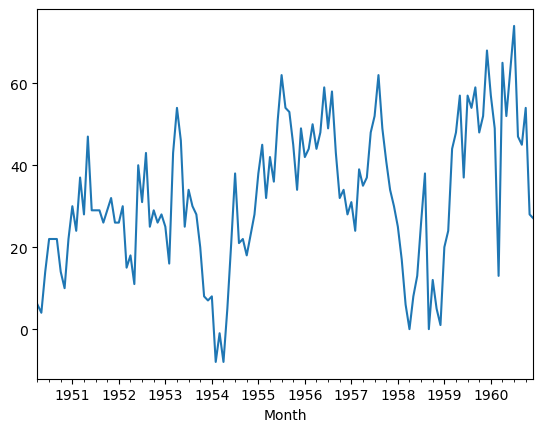

In [37]:
#Shifting 12 row and the find the difference
df['12 Shifted Passengers'] = df['#Passengers'] - df['#Passengers'].shift(12)
print(df['12 Shifted Passengers'].head())
df = df.dropna()
df['12 Shifted Passengers'].plot()
fullertest(df['12 Shifted Passengers'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


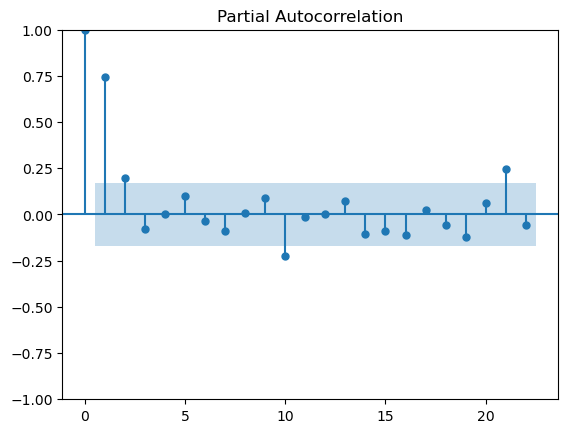

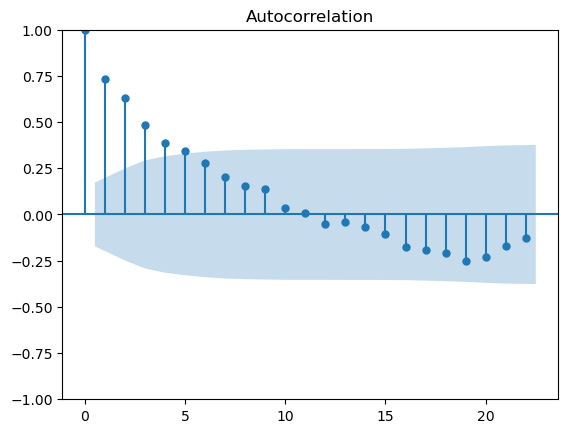

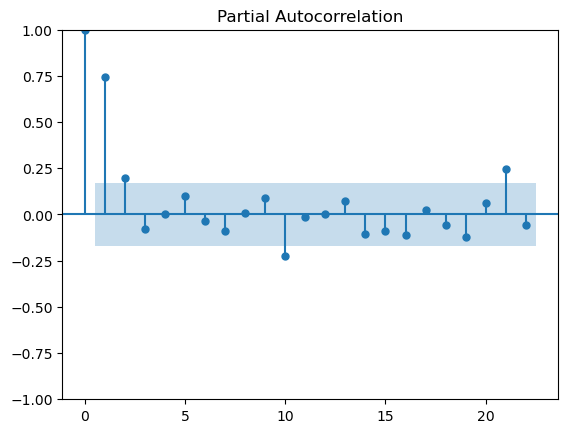

In [38]:
plot_acf(df['12 Shifted Passengers'])
plot_pacf(df['12 Shifted Passengers'])

In [39]:
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [40]:
model_ARIMA = ARIMA(train_data['#Passengers'], order=(0,2,0))
model_ARIMA_fit = model_ARIMA.fit()
print(model_ARIMA_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                   69
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -320.225
Date:                Tue, 28 Mar 2023   AIC                            642.450
Time:                        19:29:44   BIC                            644.655
Sample:                    04-01-1950   HQIC                           643.323
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       829.7223    142.174      5.836      0.000     551.066    1108.378
Ljung-Box (L1) (Q):                   3.75   Jarque-Bera (JB):                 0.76
Prob(Q):                              0.05   Pr

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [43]:
pred=model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)

In [44]:
test_data['Pred']=model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
test_data.head(10)

C:\Users\kratik\AppData\Local\Temp\ipykernel_13544\4038545600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Pred']=model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)


,#Passengers,1 Shifted Passengers,2 Shifted Passengers,12 Shifted Passengers,Pred
Month,,,,,
1956-01-01,284.0,6.0,47.0,42.0,319.0
1956-02-01,277.0,-7.0,-1.0,44.0,360.0
1956-03-01,317.0,40.0,33.0,50.0,401.0
1956-04-01,313.0,-4.0,36.0,44.0,442.0
1956-05-01,318.0,5.0,1.0,48.0,483.0
1956-06-01,374.0,56.0,61.0,59.0,524.0
1956-07-01,413.0,39.0,95.0,49.0,565.0
1956-08-01,405.0,-8.0,31.0,58.0,606.0
1956-09-01,355.0,-50.0,-58.0,43.0,647.0


In [45]:
#Let's find the residiuals to see the error in our model
residuals=test_data['#Passengers']-pred
residuals

Month
1956-01-01     -35.0
1956-02-01     -83.0
1956-03-01     -84.0
1956-04-01    -129.0
1956-05-01    -165.0
1956-06-01    -150.0
1956-07-01    -152.0
1956-08-01    -201.0
1956-09-01    -292.0
1956-10-01    -382.0
1956-11-01    -458.0
1956-12-01    -464.0
1957-01-01    -496.0
1957-02-01    -551.0
1957-03-01    -537.0
1957-04-01    -586.0
1957-05-01    -620.0
1957-06-01    -594.0
1957-07-01    -592.0
1957-08-01    -631.0
1957-09-01    -735.0
1957-10-01    -833.0
1957-11-01    -916.0
1957-12-01    -926.0
1958-01-01    -963.0
1958-02-01   -1026.0
1958-03-01   -1023.0
1958-04-01   -1078.0
1958-05-01   -1104.0
1958-06-01   -1073.0
1958-07-01   -1058.0
1958-08-01   -1085.0
1958-09-01   -1227.0
1958-10-01   -1313.0
1958-11-01   -1403.0
1958-12-01   -1417.0
1959-01-01   -1435.0
1959-02-01   -1494.0
1959-03-01   -1471.0
1959-04-01   -1522.0
1959-05-01   -1539.0
1959-06-01   -1528.0
1959-07-01   -1493.0
1959-08-01   -1523.0
1959-09-01   -1660.0
1959-10-01   -1757.0
1959-11-01   -1843.0
1959-12

From above we can see that ARIMAX model is not good enough to predict. we got a high residual prediction. This may happen because we have a seasonality dateset. Hence lets try with SARIMAX model

# SARIMAX Model

In [46]:
#SARIMAX Model
model_SARIMA=SARIMAX(train_data['#Passengers'],order=(3,0,6),seasonal_order=(0,1,0,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                   69
Model:             SARIMAX(3, 0, 6)x(0, 1, [], 12)   Log Likelihood                -213.828
Date:                             Tue, 28 Mar 2023   AIC                            447.657
Time:                                     19:33:34   BIC                            468.087
Sample:                                 04-01-1950   HQIC                           455.597
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3468      0.127     10.636      0.000       1.099       1.595
ar.L2         -1.3292      0.191     -6.957      0.000      -1.704      -0.955
ar.L3          0.9652      0.120      8.070      0.000       0.731       1.200
ma.L1         -0.6367      0.184     -3.459      0.001      -0.997      -0.276
ma.L2          1.1831      0.646      1.832      0.067      -0.082       2.449
ma.L3         -0.5650      0.352     -1.603      0.109      -1.256       0.126
ma.L4          0.1299      0.286      0.453      0.650      -0.431       0.691
ma.L5         -0.1855      0.280     -0.662      0.508      -0.735       0.364
ma.L6         -0.0204      0.210     -0.097      0.923      -0.432       0.391
sigma2        93.6092     50.250      1.863      0.062      -4.879     192.097
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.54
Prob(Q):                              0.91   Prob(JB):                         0.46
Heteroskedasticity (H):               1.39   Skew:                             0.38
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


<AxesSubplot:xlabel='Month'>

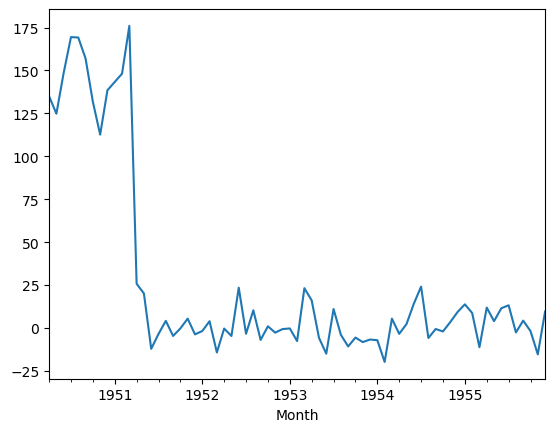

In [48]:
#Predicting the data with our model and plotting the residual graph
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['#Passengers']-pred_Sarima
model_SARIMA_fit.resid.plot()

C:\Users\kratik\AppData\Local\Temp\ipykernel_13544\2188801679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<AxesSubplot:xlabel='Month'>

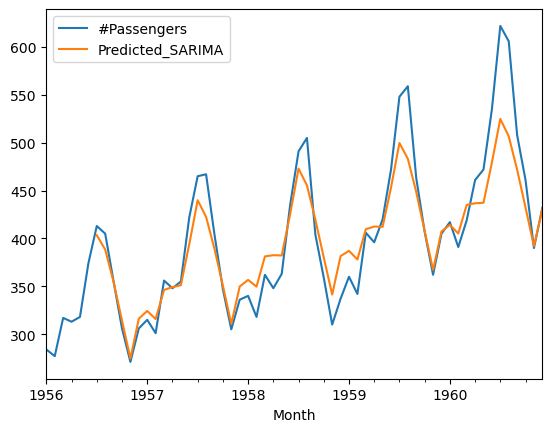

In [49]:
#Creating a column for our prdicted data in testdata dataframe and plotting the graph for a clear view
test_data['Predicted_SARIMA']=pred_Sarima
test_data[['#Passengers','Predicted_SARIMA']].plot()

# From above we can clearly see a very good prediction and SARIMAX is performing very good with seasonality data